<a href="https://colab.research.google.com/github/isabelesb/Case-Aluguel-de-Casa/blob/main/Case_Aluguel_de_casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
casas = pd.read_excel('/content/houses_rent.xlsx')
casas.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [15]:
casas = casas.rename(columns={'parking spaces':'parking_spaces', 'rent amount':'rent_amount', 'property tax':'property_tax', 'fire insurance': 'fire_insurance'})
casas.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [17]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           6080 non-null   int64 
 1   city            6080 non-null   object
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking_spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent_amount     6080 non-null   int64 
 11  property_tax    6080 non-null   int64 
 12  fire_insurance  6080 non-null   int64 
 13  total           6080 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 712.5+ KB


In [19]:
casas = casas.astype({'rent_amount':'float', 'property_tax':'float','fire_insurance':'float', 'total':'float'})
casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 712.5+ KB


In [22]:
casas = casas.query("total <= 4000.00 and animal == 'accept' and (rooms == 2 or rooms == 3)")
casas.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [27]:
casas[['rooms','total']].describe()

,rooms,total
count,1407.000000,1407.000000
mean,2.379531,2556.358209
std,0.485443,783.028975
min,2.000000,843.000000
25%,2.000000,1962.500000
50%,2.000000,2507.000000
75%,3.000000,3181.500000
max,3.000000,3998.000000


In [36]:
casas_cidades_preco = round(casas.groupby(['city'])['total'].agg('mean').reset_index(),2)
casas_cidades_preco

,city,total
0,Barcelona,2683.50
1,Porto,2161.95


In [37]:
import seaborn as sns

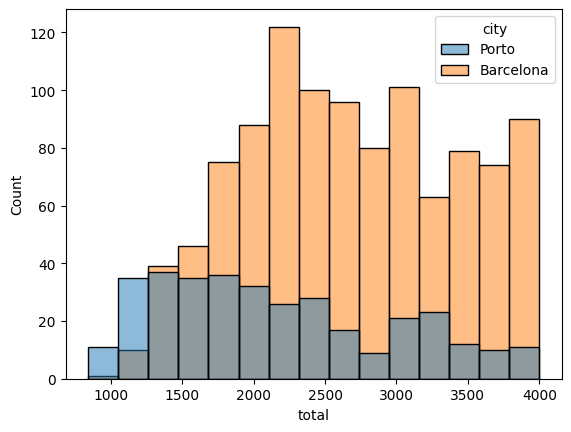

In [39]:
sns.histplot(data=casas, x='total', hue='city');

In [41]:
casas = casas.query("city == 'Porto'")
casas.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [47]:
casas_andar_preco = round(casas.groupby(['floor'])['total'].agg('mean').reset_index(),2)
casas_andar_preco

,floor,total
0,1,2004.10
1,2,1745.32
2,3,1709.92
3,4,1872.92
4,5,2385.81
5,6,2331.31
6,7,2340.75
7,8,2744.71
8,9,2941.11
9,10,1946.67


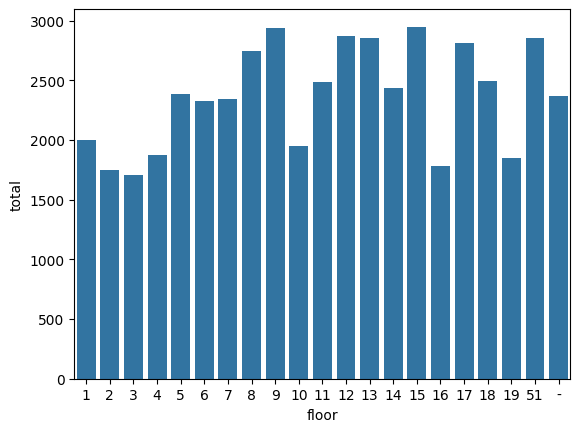

In [50]:
sns.barplot(data=casas_andar_preco, x='floor', y='total');

In [52]:
melhores_opcoes = casas.query('floor == 16')
melhores_opcoes

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0
